In [1]:
import re

import numpy as np

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = 20,12
plt.style.use('ggplot')

In [3]:
def build_params(l):
    
    losses = []
    lrs = []

    aps = []
    aps_iters = []

    ars = []
    ars_iters = []

    for s in l:
        if re.findall('epoch: \d*\\titeraion', s):

            i_dict = {x.split(':')[0]: eval(x.replace("\x00", '').split(':')[-1])
                      for x in s.split('\t')}
            
            losses.append(i_dict['loss'])
            lrs.append(i_dict['lr'][0])

        if re.findall(r'Current AP:', s):
            aps.append(float(s.split(' ')[-1]))

        if re.findall(r'maxDets=  1', s):
            ars.append(float(s.split('=')[-1]))
            
    return losses, lrs, aps, ars

        

In [4]:
def double_plot(losses, lrs, names=['loss','lr'], ylog=True, xlog=False):

    fig, ax1 = plt.subplots()
    
    color = 'tab:blue'
    ax1.set_xlabel('iterations (s)')
    ax1.set_ylabel('', color=color)
    
    if ylog:
        ax1.set_yscale('log')
    if xlog:
        ax1.set_xscale('log')
    
    ax1.plot(list(range(len(losses))), losses, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:orange'
    ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
    
    if ylog:
        ax2.set_yscale('log')
    if xlog:
        ax2.set_xscale('log')
        
    ax2.plot(list(range(len(lrs))), lrs, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.legend(names)
    plt.show()

In [5]:
num_iter = 173 

In [6]:
def mean_losses_lrs(losses, lrs, num_iter_per_epoch=173):
    mean_losses = [np.mean(losses[x:(x+num_iter_per_epoch)]) for x in list(range(0, len(losses), num_iter_per_epoch))[:-1]]
    mean_lrs = [np.mean(lrs[x:(x+num_iter_per_epoch)]) for x in list(range(0, len(lrs), num_iter_per_epoch))[:-1]]
    
    return mean_losses, mean_lrs

# Main

In [7]:
with open('outputs.txt', 'r') as f:
    l_adam8 = f.read().split('\n')

In [8]:
l_adam8[-500:]

['epoch: 246\titeraion: 10634\tloss: 2.9780678749084473\tlr: [0.006007805294848806, 0.006007805294848806]',
 'epoch: 246\titeraion: 10635\tloss: 2.7291080951690674\tlr: [0.006007805294848806, 0.006007805294848806]',
 'epoch: 246\titeraion: 10636\tloss: 2.902794361114502\tlr: [0.006007805294848806, 0.006007805294848806]',
 'epoch: 246\titeraion: 10637\tloss: 3.387814521789551\tlr: [0.006007805294848806, 0.006007805294848806]',
 'epoch: 246\titeraion: 10638\tloss: 2.8086307048797607\tlr: [0.006007805294848806, 0.006007805294848806]',
 'epoch: 246\titeraion: 10639\tloss: 2.966170310974121\tlr: [0.006007805294848806, 0.006007805294848806]',
 'epoch: 246\titeraion: 10640\tloss: 3.36490535736084\tlr: [0.006007805294848806, 0.006007805294848806]',
 'epoch: 246\titeraion: 10641\tloss: 2.9850077629089355\tlr: [0.006007805294848806, 0.006007805294848806]',
 'epoch: 246\titeraion: 10642\tloss: 2.658924102783203\tlr: [0.006007805294848806, 0.006007805294848806]',
 'epoch: 246\titeraion: 10643\tlos

In [9]:
losses, lrs, aps, ars = build_params(l_adam8)

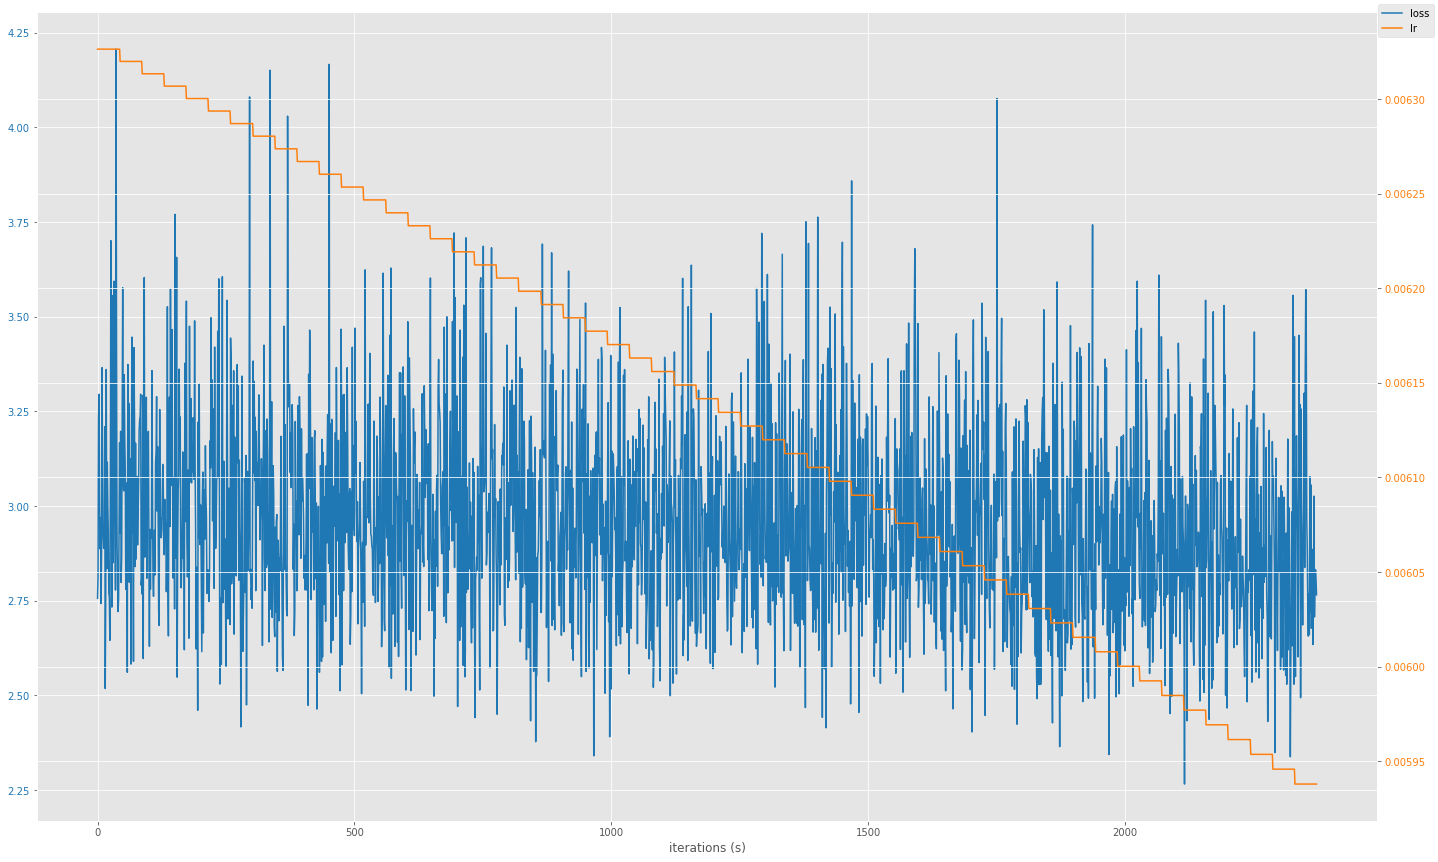

In [14]:
double_plot(losses, lrs, ylog=False, xlog=False)

## Log loss changing rate

/home/sadiakhmatov/.conda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


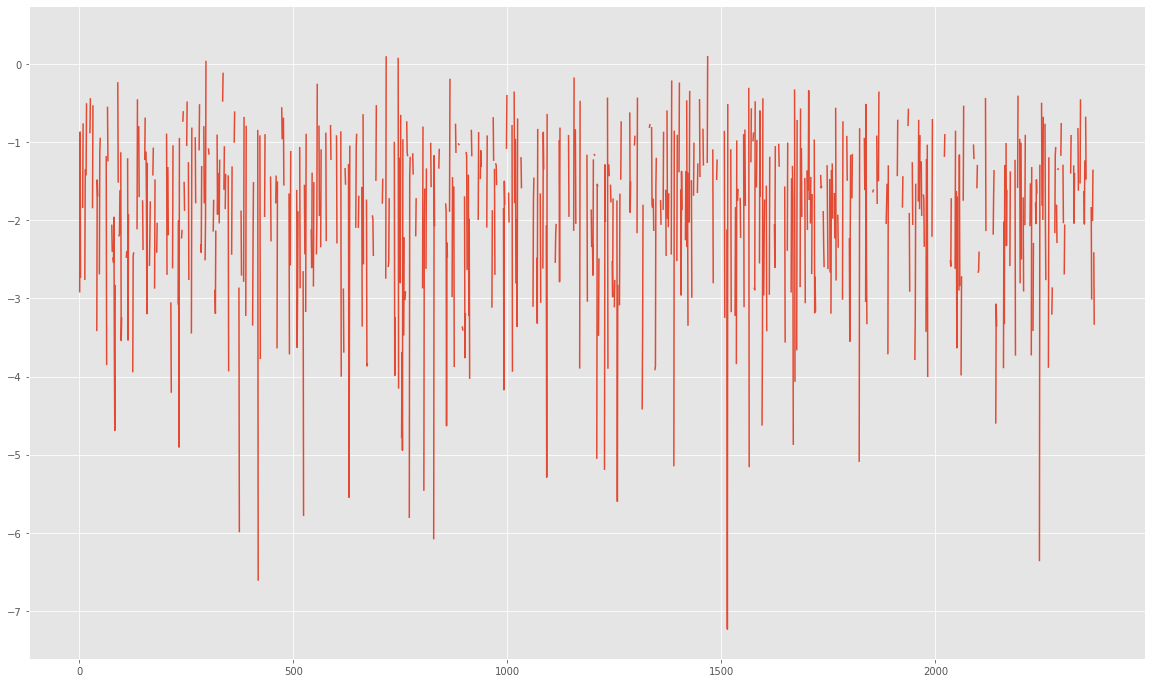

In [11]:
plt.plot(np.log(np.array(losses) - np.roll(losses, shift=1)))

## Mean log loss per epoch

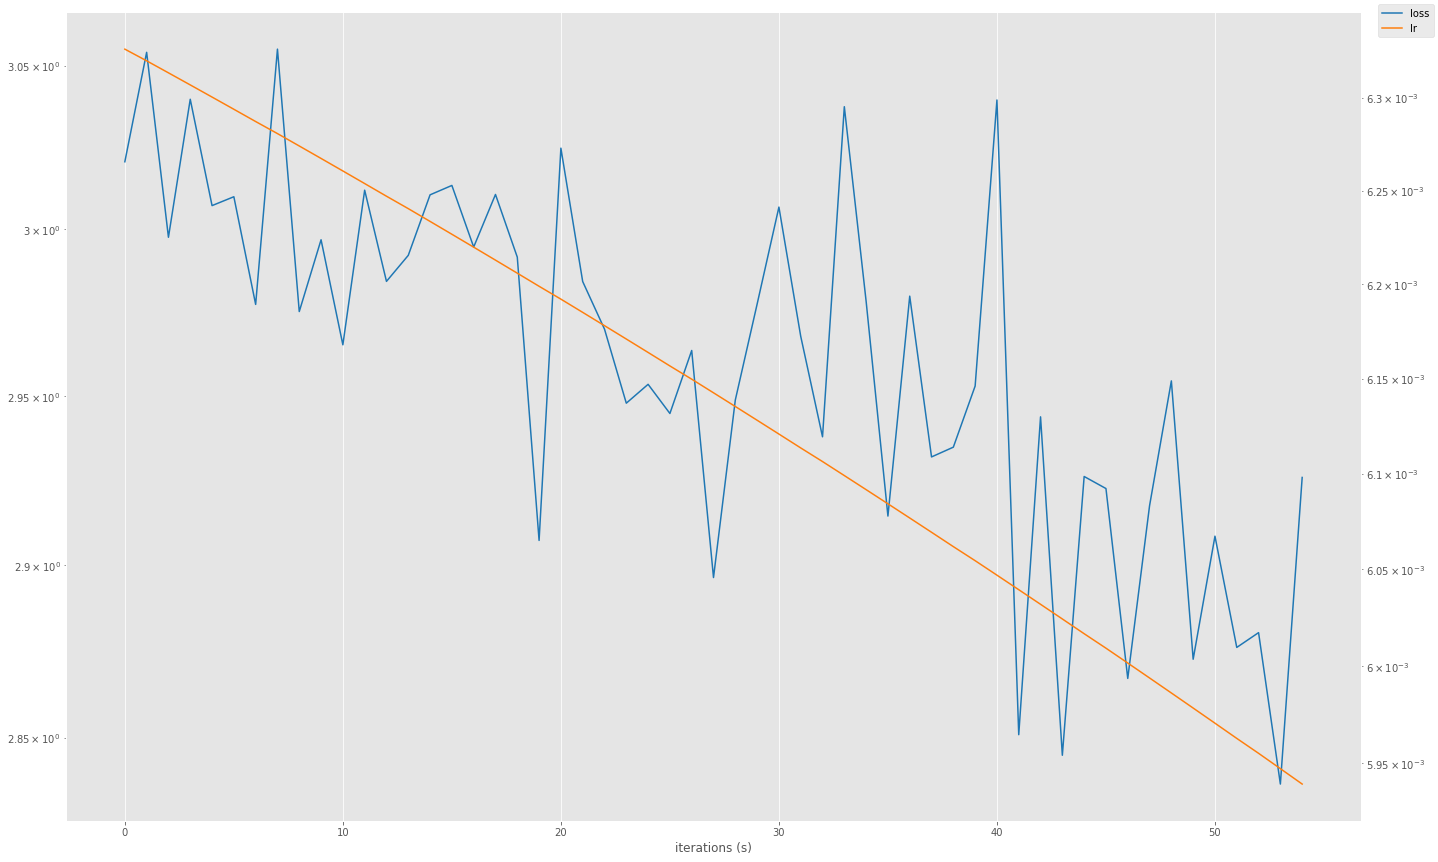

In [12]:
double_plot(*mean_losses_lrs(losses, lrs, num_iter_per_epoch=43), ylog=True, xlog=False)

## Average Precision and Average Recall metrics

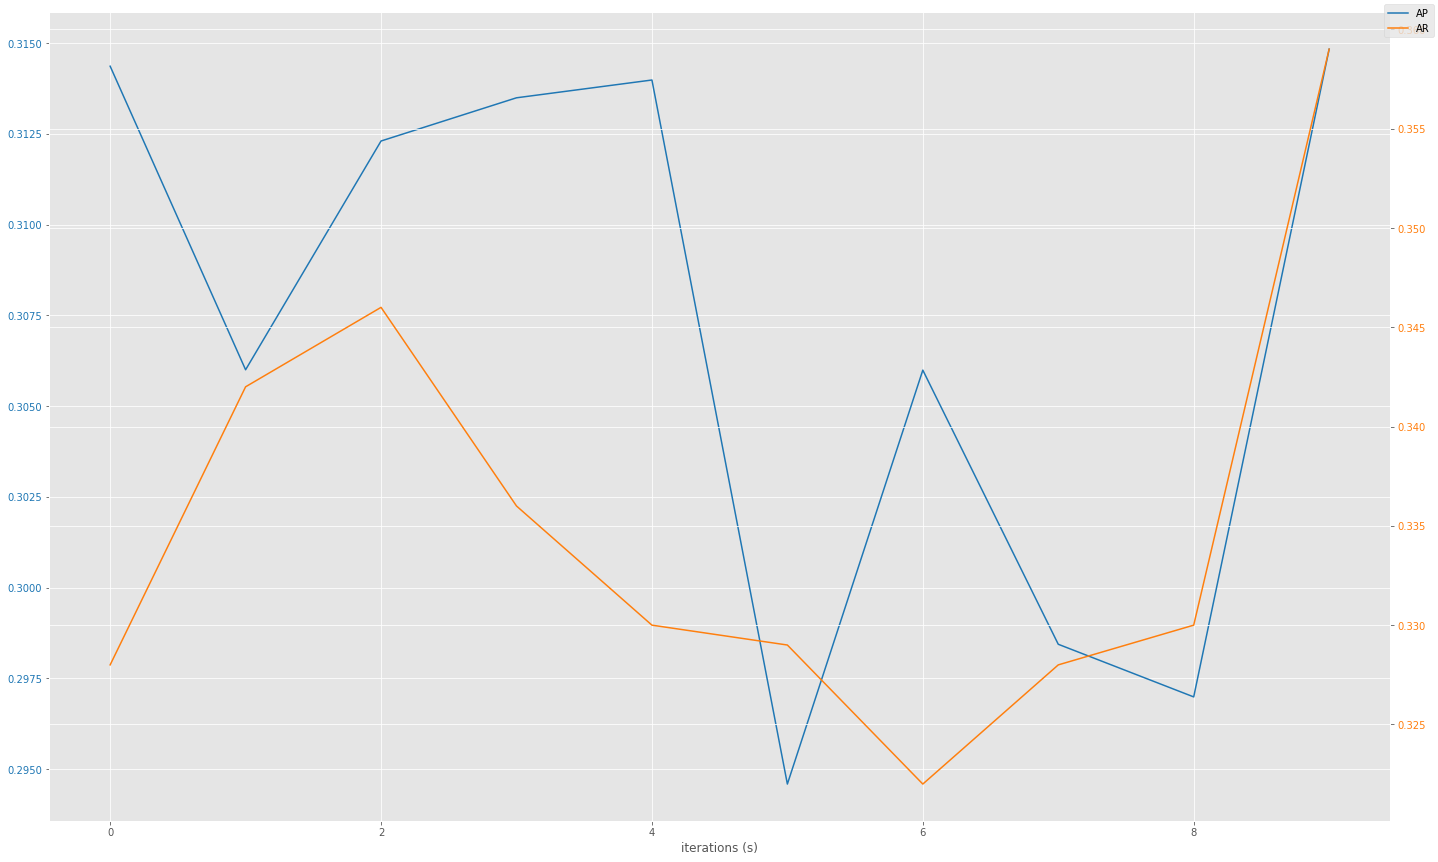

In [13]:
# log scale tells us which LR means the most
double_plot(aps, ars, ['AP', 'AR'], ylog=False)